# Ensemble Learning

## Introduction

<table>
    <tr>
        <td><img src="https://media.giphy.com/media/AYLNzUe39OSgE/giphy.gif" width="350"/></td>
        <td><img src="https://media3.giphy.com/media/CYTyHRkPkVtJe/giphy.gif" width="350"/></td>
    </tr>
</table>

To date, we have discussed fitting a single hypothesis to a particular dataset. What about combining several models into one?

### What is it?

It is a meta-model that combines several learners by voting or averaging and works for both regression and classification problems.

First 

Other Names:
 * Committee-based learning
 * Multiple classifier/regressor system
 * Combination learning
 
Do not confuse it with __partition-based models__
 * local models are used to describe specific regions (That is a different [talk](https://www.cs.utah.edu/~maljovec/files/partitionBasedRegression.pdf)):
   * Decision trees
   * Morse-Smale Regression

### Why use it?

 * Provides better __generalization__ for weak learners who tend to overfit (whole is greater than sum of its parts)
 * Squeezing more performance out of a less performant model
 * __uncertainty modeling__ - Provides richer statistical context, think of the variance of the predictors
 * One model just isn't enough (e.g., testing different hypotheses)

### How to build and use them?

 * Works better when the models are diverse
 * How many models? https://arxiv.org/pdf/1709.02925.pdf

Let $h_i(x)$ be a single learner:

Unweighted averaging (for regression):

$H(x) = \frac{\sum_{i=0}^n h_i(x)}{n}$

Majority voting (for classification):

$H(x) = \text{mode}\left(\left[h_1(x), h_2(x)... , h_n(x)\right]\right)$

## Motivating Example

Try to fit the logarithmic function $log(x)$ with low to moderate polynomials (1-10):

(-10, 5)

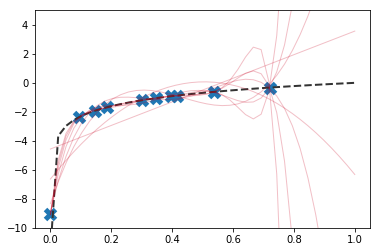

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def test_function(x):
    return np.log(x)

np.random.seed(1)
num_samples = 10
num_models = 10
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

poly_predict_y = np.zeros((len(test_x), num_models))

for i, degree in enumerate(range(1,num_models-1)):
    weak_learner = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    weak_learner.fit(train_x, train_y)

    poly_predict_y[:, i] = weak_learner.predict(test_x.reshape(-1, 1)).T

    plt.plot(test_x, poly_predict_y[:, i], linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

plt.gca().set_ylim(-10, 5)



Let's try averaging the results:

(-10, 5)

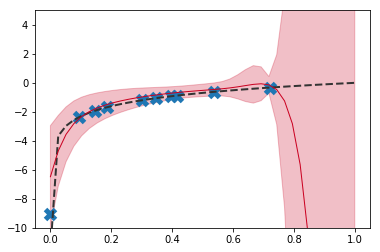

In [141]:
plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')
average_y = np.average(poly_predict_y, axis=1)
std_y = np.std(poly_predict_y, axis=1)

plt.fill_between(test_x, average_y-std_y, average_y+std_y, color='#ca0020', alpha=0.25)
plt.plot(test_x, average_y, linewidth=1, linestyle='-', c='#ca0020')
plt.gca().set_ylim(-10, 5)

## Boostrap Aggregation (Bagging)

 * Improves stability
 * Improves accuracy
 * Reduces variance (overfitting)
 
Each model is built on a subset of the data (of equal size $n'$) (a __bootstrap__ sampling). Samples are selected uniformly with replacement. Then the models are __aggregated__ into a single prediction.

Thus, some examples will have repeated data points.

(-10, 5)

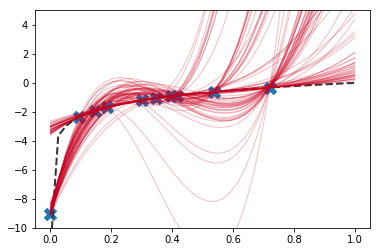

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def test_function(x):
    return np.log(x)

np.random.seed(1)
num_samples = 10
num_models = 100
subsample_size = 8
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

predict_y = np.zeros((len(test_x), num_models))

for i in range(num_models):
    weak_learner = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    indices = np.random.choice(range(num_samples), subsample_size)

    weak_learner.fit(train_x[indices], train_y[indices])

    predict_y[:, i] = weak_learner.predict(test_x.reshape(-1, 1)).T

    plt.plot(test_x, predict_y[:, i], linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

plt.gca().set_ylim(-10, 5)



(-10, 5)

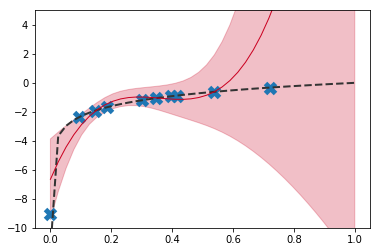

In [156]:
plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')
average_y = np.average(predict_y, axis=1)
std_y = np.std(predict_y, axis=1)

plt.fill_between(test_x, average_y-std_y, average_y+std_y, color='#ca0020', alpha=0.25)
plt.plot(test_x, average_y, linewidth=1, linestyle='-', c='#ca0020')
plt.gca().set_ylim(-10, 5)

## Boosting

 * Reduces bias (underfitting)
 * More accurate, but also can overfit
 
Data is reweighted after each subsequent model is fit in order to attempt to better fit data that is mis-classified or predicted with the largest error in the regression setting.
 
 

(-10, 5)

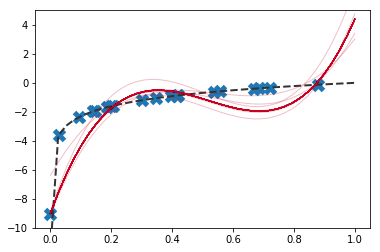

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def test_function(x):
    return np.log(x)

np.random.seed(1)
num_samples = 20
num_models = 100
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
sample_weights = np.ones(num_samples)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

predict_y = np.zeros((len(test_x), num_models))
stage = np.zeros(num_models)

for i in range(num_models):
    weak_learner = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    weak_learner.fit(train_x, train_y, **{'linearregression__sample_weight':sample_weights})

    predict_y[:, i] = weak_learner.predict(test_x.reshape(-1, 1)).T
    
    predict_train_y = weak_learner.predict(train_x)
    
    # This is adapted from: https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/ for a regression model
    training_error = (train_y - predict_train_y).flatten()
    error = np.sqrt(np.sum(sample_weights*(training_error**2))/np.sum(sample_weights))
#     error = sum(sample_weights * training_error.flatten()) / sum(sample_weights)
    stage[i] = np.log((1-error) / error)
    
    sample_weights = sample_weights * np.exp(stage[i] * training_error.flatten())

    plt.plot(test_x, predict_y[:, i], linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

plt.gca().set_ylim(-10, 5)



(-10, 5)

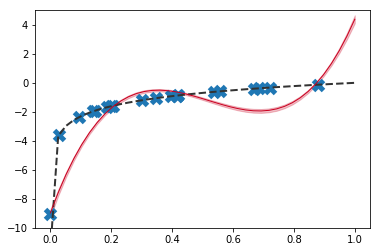

In [250]:
plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')
average_y = np.average(predict_y, axis=1)
std_y = np.std(predict_y, axis=1)

plt.fill_between(test_x, average_y-std_y, average_y+std_y, color='#ca0020', alpha=0.25)
plt.plot(test_x, average_y, linewidth=1, linestyle='-', c='#ca0020')
plt.gca().set_ylim(-10, 5)

## Adaboost

* Sensitive to noise and outliers
* Uses decision "stumps"

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


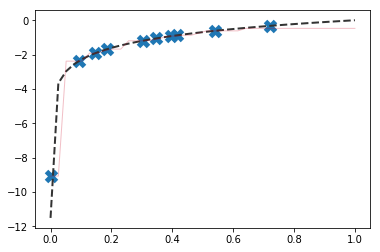

In [255]:
from sklearn.ensemble import AdaBoostRegressor

np.random.seed(1)
num_samples = 10
num_models = 100
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_x = test_x.reshape(-1,1)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

model = AdaBoostRegressor()
model.fit(train_x, train_y)

predict_y = model.predict(test_x)
plt.plot(test_x, predict_y, linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

## XGBoost

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


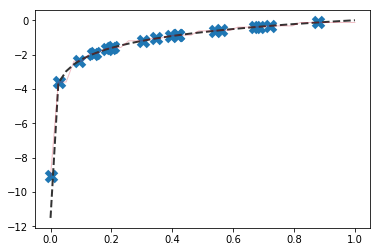

In [254]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(1)
num_samples = 10
num_models = 100
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_x = test_x.reshape(-1,1)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

model = GradientBoostingRegressor()
model.fit(train_x, train_y)

predict_y = model.predict(test_x)
plt.plot(test_x, predict_y, linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)



## Stacking

## Example: Seeing The Forest for the Trees

### Decision Tree

* Splits the domain up based on optimal axis-aligned cuts, and builds models on either side.
* Stops when leaves are too small or fit is "good enough"

### Random Forest

 * A collection of decision trees built using subsets of data

### Example: